## MA 755 - Assignment 1

by Neha, Katrina, Chengdong

### Download the data

Set up Work directory:

In [19]:
import os
os.getcwd() 
os.chdir('C:\\Users\\Chengdong Liang\\Desktop\\MA 755\\Assignment 1')
os.getcwd()

'C:\\Users\\Chengdong Liang\\Desktop\\MA 755\\Assignment 1'

Here is the function to fetch the data:

In [20]:
import os
import zipfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://ed-public-download.apps.cloud.gov/downloads/"
COLLEGE_PATH = "datasets/college"
COLLEGE_URL = DOWNLOAD_ROOT + "CollegeScorecard_Raw_Data.zip"

def fetch_college_data(college_url=COLLEGE_URL, college_path=COLLEGE_PATH):
    os.makedirs(college_path, exist_ok=True)
    zip_path = os.path.join(college_path, "Raw_Data.zip")
    urllib.request.urlretrieve(college_url, zip_path)
    college_zip = zipfile.ZipFile(zip_path)
    college_zip.extractall(path=college_path)
    college_zip.close()

Now call the **fetch_college_data()**, it creates a datasets/college directory in the workspace, it downloads the *CollegeScorecard_Raw_Data.zip* file and extracts all files from it in this directory.

In [21]:
 fetch_college_data()

Load the data from the *MERGED2014_15_PP.csv* file into a DataFrame Pandas object stored in *college_original*:

In [22]:
import pandas as pd

DATA_PATH= "datasets/college/CollegeScorecard_Raw_Data"

def load_college_data(data_path=DATA_PATH):
    # `data_path` is relative to the directory containing this script
    csv_path = os.path.join(data_path, "MERGED2014_15_PP.csv")
    return pd.read_csv(csv_path)

### Take a quick look at the data structure

In [23]:
college_original = load_college_data()
print(type(college_original))
college_original.head()

<class 'pandas.core.frame.DataFrame'>


C:\Users\Chengdong Liang\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (6,9,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1411,1425,1427,1503,1517,1529,1530,1532,1537,1540,1541,1542,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1605,1606,1609,1610,1613,1614,1615,1725,1726,1727,1728,1729) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D100_L4,TRANS_4,DTRANS_4,TRANS_L4,DTRANS_L4,ICLEVEL,UGDS_MEN,UGDS_WOMEN,CDR3_DENOM,CDR2_DENOM
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,NaN,0.0000,1044.0,NaN,NaN,1,0.4831,0.5169,1895.0,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,NaN,0.2408,1246.0,NaN,NaN,1,0.4169,0.5831,3937.0,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,NaN,0.0000,9.0,NaN,NaN,1,0.3986,0.6014,344.0,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,NaN,0.3477,765.0,NaN,NaN,1,0.5733,0.4267,1513.0,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,NaN,0.0000,1330.0,NaN,NaN,1,0.3877,0.6123,2137.0,NaN


The data is stored in a pandas.dataframe. Each row represnts one college. There are 1743 attributes. 

For our further steps, we need to subset the data set with our dependent varibles and independent variables.

### Subsetting the data

Based on the original dataset, a new dataframe is created, which includes the variables we mainly focus on:
* Identifier variable
* Dependent variable
* Independent varible

| **Variables** | **Description**           | **Type**  |
| ------------- |:-------------:| -----:|
|UNITID|Unit ID for institution | Identifier
|PCTFLOAN      | Rate of receiving federal loans | Dependent |
| DEBT_MDN      | Cumulative Median Debt      |   Independent |
| FAMINC | Average family income in real 2015 dollars      |   Independent |
| HIGHDEG |Highest degree awarded      |    Independent |
| REGION | Region     |   Independent |
Let's have a quick look at the first 5 rows of the data by using the DataFrame’s **head()** method.

In [24]:
college=college_original[['UNITID','PCTFLOAN','DEBT_MDN','FAMINC','HIGHDEG','REGION']]
college.head()

,UNITID,PCTFLOAN,DEBT_MDN,FAMINC,HIGHDEG,REGION
0,100654,0.8284,15000,30235.73401,4,5
1,100663,0.5214,14382,49731.07607,4,5
2,100690,0.7795,9500,19862.04352,4,5
3,100706,0.4596,15750,52681.57006,4,5
4,100724,0.7554,14362,29758.63871,4,5


From the first 5 rows of the data, there are two variables (*HIGHDEG* and *REGION*) have repetitive values, which indicates that they might be categorical variables. 

Use the **value_counts()** method to have a closer look at these two variables.

In [25]:
college["HIGHDEG"].value_counts()

1    2606
4    2026
2    1671
3     937
0     463
Name: HIGHDEG, dtype: int64

In [26]:
college["REGION"].value_counts()

5    1890
2    1182
3    1147
8    1099
6     821
4     663
1     442
7     297
9     161
0       1
Name: REGION, dtype: int64

The **info()** method is useful to get a quick description of the data, in particular the total number of rows, and each attribute's type and number of non-null values:

In [27]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 6 columns):
UNITID      7703 non-null int64
PCTFLOAN    6966 non-null float64
DEBT_MDN    7671 non-null object
FAMINC      7497 non-null object
HIGHDEG     7703 non-null int64
REGION      7703 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 361.2+ KB


From the general information, as shown above, the variables *DEBT_MDN* and *FAMINC* are not numeric, and the variables *HIGHDEG* and *REGION* are not categorical; therefore, the change of variable types is needed.

In [28]:
college["DEBT_MDN"]=pd.to_numeric(college["DEBT_MDN"],errors='coerce')
college["FAMINC"]=pd.to_numeric(college["FAMINC"],errors='coerce')
college["HIGHDEG"] = college["HIGHDEG"].astype('category')
college["REGION"] = college["REGION"].astype('category')

C:\Users\Chengdong Liang\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Chengdong Liang\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Chengdong Liang\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

Use the **describe()** method to demonstrate the basic statistics of each numerical variables: number of rows, mean, standard deviation, minimum, first quartile, second quartile, third quartile and maximum.

*Note*: the missing values are automatically excluded on the row count, mean, min and max.

In [29]:
college.describe()

,UNITID,PCTFLOAN,DEBT_MDN,FAMINC
count,7.703000e+03,6966.000000,6681.000000,7386.000000
mean,1.663052e+06,0.523092,11303.130295,35353.389779
std,6.566910e+06,0.284088,5336.993010,21962.527660
min,1.006540e+05,0.000000,1000.000000,0.000000
25%,1.742420e+05,0.333300,7500.000000,20844.716155
50%,2.304720e+05,0.584900,9500.000000,27910.776550
75%,4.476520e+05,0.747325,14400.000000,43169.232665
max,4.841450e+07,1.000000,37500.000000,152099.754600


Use the **hist()** method to plot a histogram for numerical variables in order to know the distribution of each numerical variable

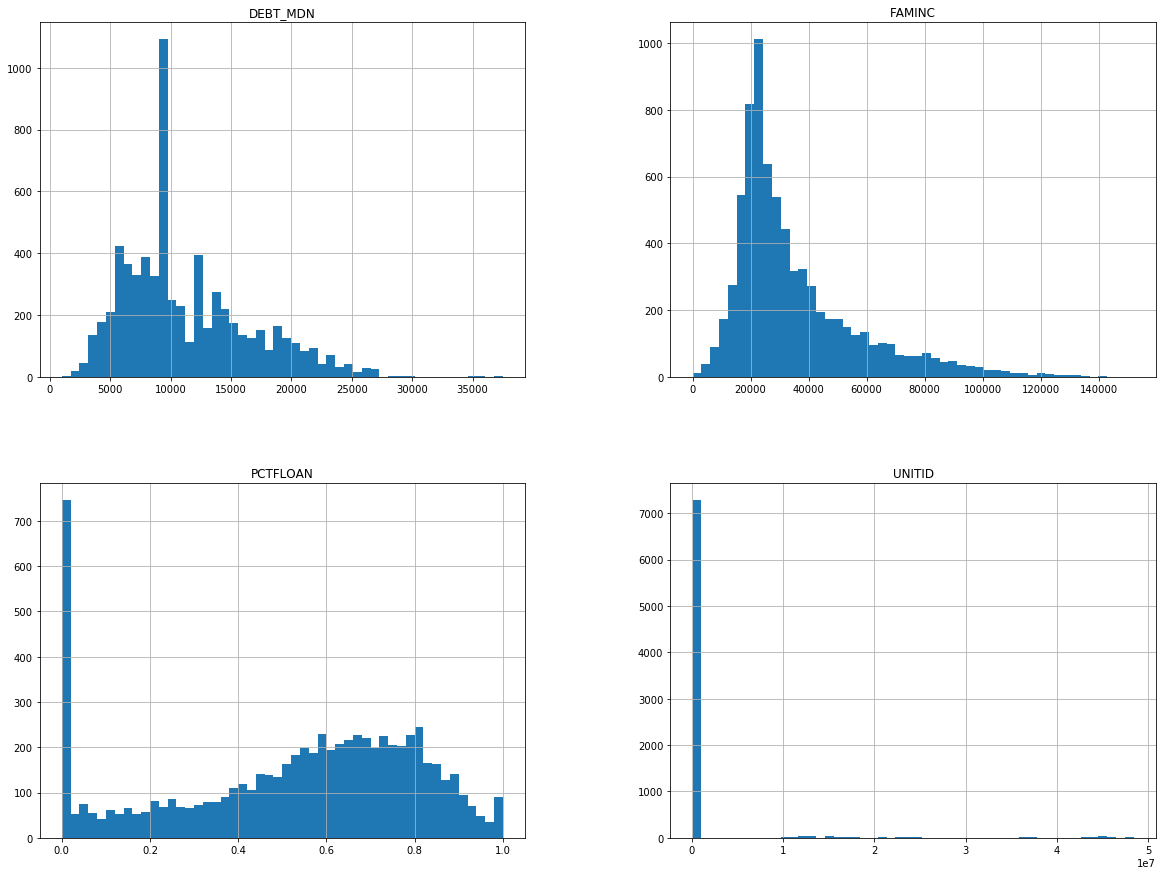

In [30]:
%matplotlib inline 
import matplotlib.pyplot as plt
college.hist(bins=50, figsize=(20,15))
plt.show()

*Note*: %matplotlib inline can be used only in a Jupyter notebook. It allows Jupyter to create Matplotlib so that the Jupyter's own backend is available to be used. 

Moreover, show() is optional.

### Create a test set

Split the dataset into a train set train_set and a test set test_set. 80% of the data will be used as the training set (named train_set), and 20% used as the test set (named test_set). There are different approaches to split the data, as shown in the following part.

#### Method 1

Creaing a test set is theoretically quite simple: just pick some instances randomly:

In [31]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [32]:
train_set, test_set = split_train_test(college, 0.2)
print(len(train_set), "train +", len(test_set), "test")

6163 train + 1540 test


But this method will break next time when you fetch an updated dataset. A common solution is to use each instance's identifier to decide whether or not is should go in the test set:

#### Method 2 
This method uses the unique identifier to decide whether the corresponding instance should be partitioned to the test set, which helps to aviod the situation that the test set changes whenever the program is run again.

In [33]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

We could use *UNITID* as the unique identifier.

In [34]:
train_set, test_set = split_train_test_by_id(college, 0.2, "UNITID")